<a href="https://colab.research.google.com/github/nshi02/User_activity/blob/main/User_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ пользовательской активности на основе данных сервиса бронирования.

## Введение.
CSV файл содержит данные о действиях, совершенных пользователями по поиску услуги. Он содержит в себе описание действий и данные об общем и уникальном количестве сессий.

Необходимо получить ответы на следующие вопросы:


1.  Сколько людей пользуются фильтрами?
2.	В каких городах фильтрами пользуются больше? В каких меньше?
3.	Какие разделы фильтров наиболее востребованы? “фильтры”, “сортировка”, “категории”?
4.	Как часто люди пользуются выбором цены?

Дополнительно:
Оформить инсайты, которые еще можно сделать на основе данных.

##Выгрузка, первичный анализ и очистка данных.

In [ ]:
!pip install -q gdown
!gdown 1NDtY-LzbOV92lxcj5dtkQ4ctSgccv8E8


Downloading...
From: https://drive.google.com/uc?id=1NDtY-LzbOV92lxcj5dtkQ4ctSgccv8E8
To: /content/events filters(sputnik).csv
100% 1.59M/1.59M [00:00<00:00, 157MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/events filters(sputnik).csv')
df.head()


,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2


**Проверка на пропуски и дубликаты.**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19092 entries, 0 to 19091
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_category  19092 non-null  object
 1   event_action    19092 non-null  object
 2   event_label     19092 non-null  object
 3   total_events    19092 non-null  int64 
 4   unique_events   19092 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 745.9+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['event_category'].value_counts()

,count
event_category,
city_landing,18441
City Page,651


Можно наблюдать, что столбец event_label имеет неоднородную структуру данных, поэтому для дальнейшего удобства приведем записи к одному регистру и выделим города и примененный фильтры, если таковые были использованы.

In [ ]:
df['event_label']=df['event_label'].str.lower()
df['event_label_clean'] = df['event_label'].str.replace(r'\s*\([^)]*\)', '', regex=True)
df['event_label_clean'] = df['event_label_clean'].str.replace(r':\s*\d+', '', regex=True)
df['city'] = df['event_label_clean'].str.extract(r'^([^/]+)').iloc[:, 0].str.strip()
df.head()

,event_category,event_action,event_label,total_events,unique_events,event_label_clean,city
0,city_landing,price_button_submit,tula / показать предложения (11),8,7,tula / показать предложения,tula
1,city_landing,price_button_submit,sochi / показать предложения (39),12,10,sochi / показать предложения,sochi
2,city_landing,search-tools-button_open,penza / сортировка,2,2,penza / сортировка,penza
3,city_landing,filters-categories_click,gelendzhik / экскурсии в геленджике цены,1,1,gelendzhik / экскурсии в геленджике цены,gelendzhik
4,city_landing,price_button_submit,moscow / показать предложения (345),2,2,moscow / показать предложения,moscow


In [ ]:
df['event_action'].value_counts()

,count
event_action,
price_button_submit,7354
search-tools-button_open,4848
filters-categories_click,3352
ticket-type_checkbox,795
Page Visit,651
dates_filter_mobile,425
start_date_click,299
price_button_close,277
end_date_click,274


##Исследовательская часть

###Вопрос 1
**Сколько людей пользуется фильтрами?**

In [ ]:
df[df['event_action']=='search-tools-button_open']

,event_category,event_action,event_label,total_events,unique_events,event_label_clean,city,is_filter_action,filter_section
2,city_landing,search-tools-button_open,penza / сортировка,2,2,penza / сортировка,penza,True,NaN
13,city_landing,search-tools-button_open,crete / фильтры выбрано: 1,9,9,crete / фильтры выбрано,crete,True,NaN
18,city_landing,search-tools-button_open,irkutsk / кбжд,2,2,irkutsk / кбжд,irkutsk,True,NaN
22,city_landing,search-tools-button_open,adler / какие экскурсии в адлере,1,1,adler / какие экскурсии в адлере,adler,True,NaN
27,city_landing,search-tools-button_open,haifa / категории все,4,4,haifa / категории все,haifa,True,NaN
...,...,...,...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,tbilisi / категории обзорные,1,1,tbilisi / категории обзорные,tbilisi,True,NaN
19070,city_landing,search-tools-button_open,alanya / морские прогулки,6,5,alanya / морские прогулки,alanya,True,NaN
19079,city_landing,search-tools-button_open,anapa / в крым,5,4,anapa / в крым,anapa,True,NaN
19087,city_landing,search-tools-button_open,istanbul / экскурсии в стамбуле,38,32,istanbul / экскурсии в стамбуле,istanbul,True,NaN


In [ ]:
open_filter_mask = (
    (df['event_action'] == 'search-tools-button_open') &
    (df['event_label'].str.contains('фильтр', na=False))
)

print("Количество пользователей, использовавших именно фильтры:",df[open_filter_mask]['unique_events'].size)
open_filter_users = df[open_filter_mask]['unique_events'].sum()
print("Количество уникальных действий с фильтрами:",open_filter_users)

Количество пользователей, использовавших именно фильтры: 612
Количество уникальных действий с фильтрами: 19246


In [ ]:
df[open_filter_mask]['event_label']

,event_label
13,crete / фильтры выбрано: 1
61,tolyatti / фильтры
131,adler / фильтры выбрано: 0
182,yerevan / фильтры
218,yessentuki / фильтры выбрано: 0
...,...
18926,tbilisi / фильтры выбрано: 0
18928,durban / фильтры
18939,istanbul / фильтры выбрано: 1
19038,limassol / фильтры


In [ ]:
df['is_filter_action'] = df['event_action'] != 'Page Visit'
filter_users = df[df['is_filter_action']]['unique_events'].sum()
total_visits = df[df['event_action'] == 'Page Visit']['unique_events'].sum()
filter_user_ratio = filter_users / total_visits
print(f"Доля пользователей, использующих фильтры: {filter_user_ratio:.2%}")

Доля пользователей, использующих фильтры: 21.31%


Количество пользователей, открывших раздел фильтры/сортировки/категории: 4848 (search-tools-button_open) \\
То, сколько раз применялись фильтры/сортировки/категории:  7354 (price_button_submit) \\
Количество пользователей, использовавших именно фильтры: 612 \\
Количество уникальных действий с фильтрами: 19246



###Вопрос 2
**В каких городах фильтрами пользуются больше? В каких меньше?**

In [ ]:
filter_event_actions = [
    'ticket-type_checkbox',
    'start_date_click',
    'end_date_click',
    'dates_filter_mobile',
    'price_first',
    'price_second',
    'price_third',
    'pay-type_checkbox'
]

In [ ]:
city_usage = df[df['event_action'].isin(filter_event_actions)].groupby('city')['unique_events'].sum().sort_values(ascending=False)

print("Топ городов по использованию фильтров:")
print(city_usage.head(10))

print("Города с наименьшим использованием фильтров:")
print(city_usage.tail(10))


Топ городов по использованию фильтров:
city
kaliningrad         6168
saint petersburg    5785
moscow              4168
istanbul            2772
sochi               2632
budapest            2176
kazan               1858
kislovodsk          1607
pyatigorsk          1496
anapa               1369
Name: unique_events, dtype: int64
Города с наименьшим использованием фильтров:
city
hammamet      1
belgorod      1
nuremberg     1
punta cana    1
frankfurt     1
saransk       1
stresa        1
dmitrov       1
toledo        1
tunis         1
Name: unique_events, dtype: int64


In [ ]:
filter_df = df[df['event_action'] == 'Page Visit']
top_cities = filter_df.groupby('city')['unique_events'].sum().sort_values(ascending=False)

top_cities.head(10)



,unique_events
city,
saint petersburg,231941
moscow,134254
kaliningrad,67996
kazan,51796
sharm-el-sheikh,43706
sochi,40210
istanbul,37072
anapa,36856
hurghada,32628


In [ ]:
full = pd.merge(top_cities, city_usage, on='city', how='inner')
full = full.rename(columns={
    'unique_events_x': 'page_visit',
    'unique_events_y': 'filter_usage'
})


full.head(10)

,page_visit,filter_usage
city,,
saint petersburg,231941,5785
moscow,134254,4168
kaliningrad,67996,6168
kazan,51796,1858
sharm-el-sheikh,43706,734
sochi,40210,2632
istanbul,37072,2772
anapa,36856,1369
hurghada,32628,481


Наиболее посещаемые страницы городов и страницы, на которых наиболее часто использую фильтры, частично различаются. Стоит проверить по дополнительным данным связано ли это с тем, что предложений мало, или с тем, что пользователь сразу находит нужное.

###Вопрос 3
**Какие разделы фильтров наиболее востребованы? “фильтры”, “сортировка”, “категории”?** \\
На основе столбца event_label можно посмотреть сколько запросов каждого типа  [“фильтры”, “сортировка”, “категории”] было сделано:


In [ ]:
df[df['event_action']=='search-tools-button_open']

,event_category,event_action,event_label,total_events,unique_events,event_label_clean,city,is_filter_action
2,city_landing,search-tools-button_open,penza / сортировка,2,2,penza / сортировка,penza,True
13,city_landing,search-tools-button_open,crete / фильтры выбрано: 1,9,9,crete / фильтры выбрано,crete,True
18,city_landing,search-tools-button_open,irkutsk / кбжд,2,2,irkutsk / кбжд,irkutsk,True
22,city_landing,search-tools-button_open,adler / какие экскурсии в адлере,1,1,adler / какие экскурсии в адлере,adler,True
27,city_landing,search-tools-button_open,haifa / категории все,4,4,haifa / категории все,haifa,True
...,...,...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,tbilisi / категории обзорные,1,1,tbilisi / категории обзорные,tbilisi,True
19070,city_landing,search-tools-button_open,alanya / морские прогулки,6,5,alanya / морские прогулки,alanya,True
19079,city_landing,search-tools-button_open,anapa / в крым,5,4,anapa / в крым,anapa,True
19087,city_landing,search-tools-button_open,istanbul / экскурсии в стамбуле,38,32,istanbul / экскурсии в стамбуле,istanbul,True


In [ ]:
df[df['event_action']=='filters-categories_click']

,event_category,event_action,event_label,total_events,unique_events,event_label_clean,city,is_filter_action
3,city_landing,filters-categories_click,gelendzhik / экскурсии в геленджике цены,1,1,gelendzhik / экскурсии в геленджике цены,gelendzhik,True
9,city_landing,filters-categories_click,krakow / необычные,3,3,krakow / необычные,krakow,True
11,city_landing,filters-categories_click,barcelona / сначала самые дешевые,62,50,barcelona / сначала самые дешевые,barcelona,True
12,city_landing,filters-categories_click,novorossiysk / автобусные,42,32,novorossiysk / автобусные,novorossiysk,True
15,city_landing,filters-categories_click,sergiev posad / групповые,10,8,sergiev posad / групповые,sergiev posad,True
...,...,...,...,...,...,...,...,...
19074,city_landing,filters-categories_click,belek / для детей,21,15,belek / для детей,belek,True
19075,city_landing,filters-categories_click,rome / на сигвее,1,1,rome / на сигвее,rome,True
19080,city_landing,filters-categories_click,istanbul / экскурсии в стамбуле на русском язы...,1,1,istanbul / экскурсии в стамбуле на русском язы...,istanbul,True
19083,city_landing,filters-categories_click,moscow / экскурсии москва,14,10,moscow / экскурсии москва,moscow,True


In [ ]:
keywords = ['фильтры', 'сортировка', 'категории']
filtered_df = df[df['event_label'].str.contains('|'.join(keywords))]
count_filtered_rows = filtered_df.shape[0]

print(f"Количество строк, содержащих 'фильтры', 'сортировка' или 'категории': {count_filtered_rows}")

Количество строк, содержащих 'фильтры', 'сортировка' или 'категории': 1771


In [ ]:
count_filters = df['event_label'].str.contains('фильтр').sum()
count_categories = df['event_label'].str.contains('категор').sum()
count_sorting = df['event_label'].str.contains('сортировка').sum()

print(f"Количество строк с 'фильтр': {count_filters}")
print(f"Количество строк с 'категория': {count_categories}")
print(f"Количество строк с 'сортировка': {count_sorting}")

Количество строк с 'фильтр': 612
Количество строк с 'категория': 730
Количество строк с 'сортировка': 429


Если рассматривать конкретно использование фильтров, то можно упорядочить их по количеству использования на основе значений unique events. Результаты представлены в диаграмме ниже.
На  ее основе  можно сделать вывод, что самыми важными параметрами при выборе экскурсии являются тип экскурсионной группы и время начала.


event_action
ticket-type_checkbox    17918
start_date_click        14501
end_date_click          11738
dates_filter_mobile     10272
price_first              6676
pay-type_checkbox        5465
price_second             1995
price_third               595
Name: unique_events, dtype: int64


<ipython-input-14-38768fcf5391>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filter_usage.values, y=filter_usage.index, palette='viridis')


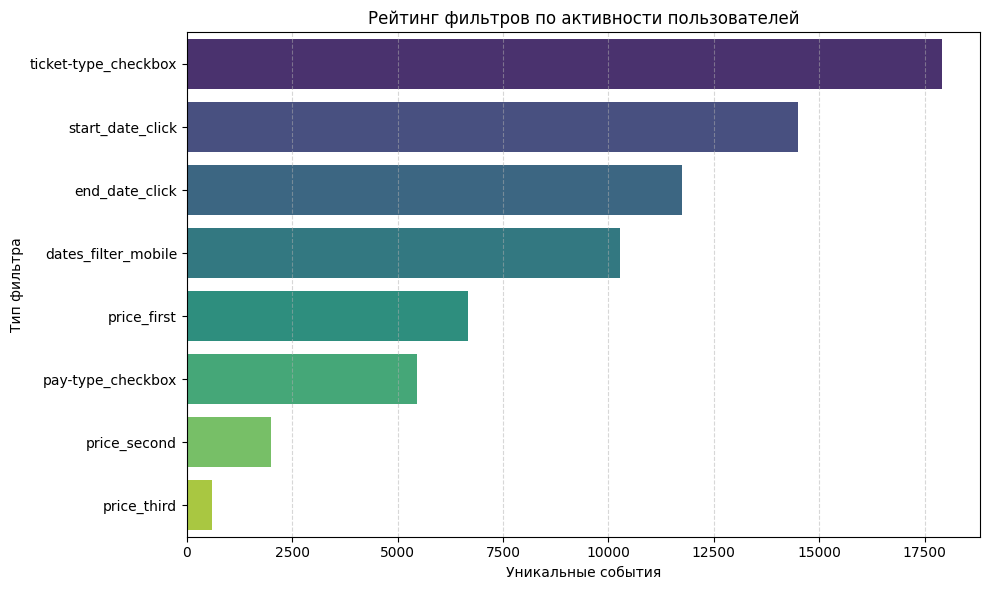

In [ ]:
filter_usage = df[df['event_action'].isin(filter_event_actions)] \
    .groupby('event_action')['unique_events'].sum().sort_values(ascending=False)

print(filter_usage)
plt.figure(figsize=(10, 6))
sns.barplot(x=filter_usage.values, y=filter_usage.index, palette='viridis')
plt.xlabel('Уникальные события')
plt.ylabel('Тип фильтра')
plt.title('Рейтинг фильтров по активности пользователей')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###Вопрос 4
**Как часто люди пользуются выбором цены?**

In [ ]:
filter_sections = {
    'ticket-type_checkbox': 'категории',
    'pay-type_checkbox': 'категории',
    'start_date_click': 'даты',
    'end_date_click': 'даты',
    'dates_filter_mobile': 'даты',
    'price_first': 'цена',
    'price_second': 'цена',
    'price_third': 'цена',
}

df['filter_section'] = df['event_action'].map(filter_sections)
section_usage = df[df['filter_section'].notnull()] \
    .groupby('filter_section')['unique_events'].sum().sort_values(ascending=False)

print("Популярность разделов фильтров:")
print(section_usage)


Популярность разделов фильтров:
filter_section
даты         36511
категории    23383
цена          9266
Name: unique_events, dtype: int64


Количество уникальных обращений, связанных с ценами - 9266.

In [ ]:
df[df['event_action']=='price_first']

,event_category,event_action,event_label,total_events,unique_events,event_label_clean,city,is_filter_action,filter_section
527,city_landing,price_first,sortavala,2,2,sortavala,sortavala,True,цена
577,city_landing,price_first,lipetsk,1,1,lipetsk,lipetsk,True,цена
692,city_landing,price_first,penza,2,1,penza,penza,True,цена
793,city_landing,price_first,grozny,14,11,grozny,grozny,True,цена
856,city_landing,price_first,montreal,1,1,montreal,montreal,True,цена
...,...,...,...,...,...,...,...,...,...
18658,city_landing,price_first,berlin,8,8,berlin,berlin,True,цена
18838,city_landing,price_first,suzdal,36,26,suzdal,suzdal,True,цена
18996,city_landing,price_first,stockholm,2,2,stockholm,stockholm,True,цена
19001,city_landing,price_first,pskov,68,52,pskov,pskov,True,цена


##Дополнительно

In [ ]:
clear_filters = df[df['event_action'] == 'clear_filter_mobile']['unique_events'].sum()
filter_applies = df[df['event_action'] == 'price_button_submit']['unique_events'].sum()
clear_ratio = clear_filters / filter_applies if filter_applies > 0 else 0
print(f"Доля очисток фильтров после применения: {clear_ratio:.2%}")


Доля очисток фильтров после применения: 4.42%


Процент очистки фильтров сразу после использования 4.42% . Это может указывать на то, что пользователи не удовлетворены результатами фильтрации или изменяют свои критерии поиска.

In [ ]:
(df[df['event_action']=='price_button_close'].unique_events.sum()/df[df['event_action']=='filters-categories_click'].\
 unique_events.sum())*100

np.float64(18.62197988455204)

Процент закрытия окошка с фильтрами после взаимодействия с фильтрами без их применения 18,6%.

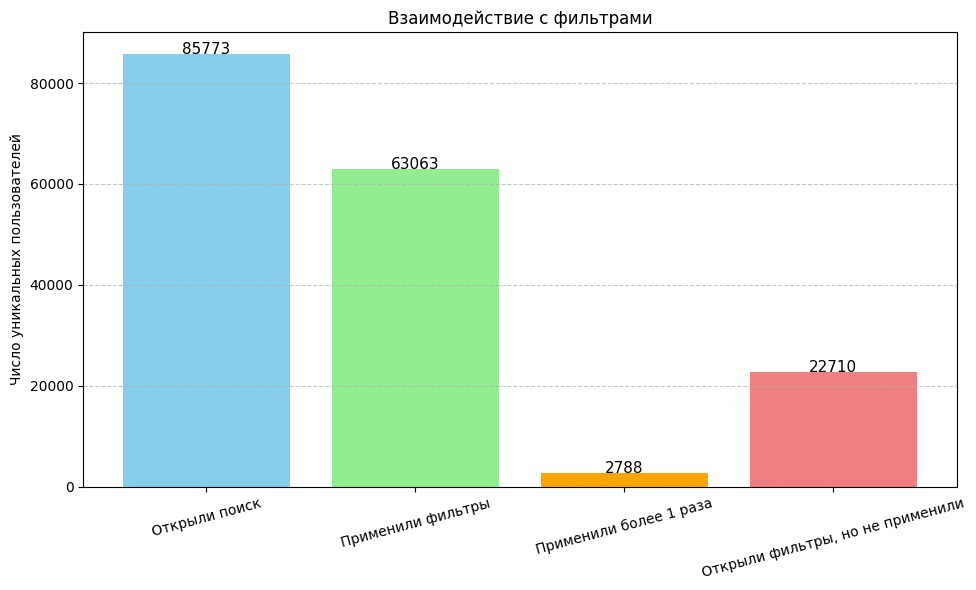

In [ ]:
opened = df[df['event_action'] == 'search-tools-button_open']['unique_events'].sum()
submitted = df[df['event_action'] == 'price_button_submit']['unique_events'].sum()
closed = df[df['event_action'] == 'price_button_close']['unique_events'].sum()
cleared = df[df['event_action'] == 'clear_filter_mobile']['unique_events'].sum()


only_opened = opened - submitted
used_more = opened - submitted


labels = [
    'Открыли поиск',
    'Применили фильтры',
    'Применили более 1 раза',
    'Открыли фильтры, но не применили',

]
values = [
    opened,
    submitted,
    cleared,
    only_opened
]

colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']


plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)
plt.title('Взаимодействие с фильтрами')
plt.ylabel('Число уникальных пользователей')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval)}', ha='center', fontsize=11)

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
clear_events = df[df['event_action'] == 'clear_filter_mobile']
clear_by_city = clear_events.groupby('city')['unique_events'].sum().sort_values(ascending=False)

print("Топ городов по количеству очисток фильтров:")
print(clear_by_city.head(10))



Топ городов по количеству очисток фильтров:
city
kaliningrad         283
saint petersburg    182
moscow              157
istanbul            146
anapa               113
kislovodsk           85
kazan                72
sochi                70
budapest             67
nalchik              64
Name: unique_events, dtype: int64


посмотрели, сколько пользователей после посещения страницы города переходил к дальнейшему поиску действий в этом городе и сколько потом доходило до бронирования

Воронка событий для пользователей просмотр страницы города -> активация фильтров -> применение фильтров -> просмотр предложений

In [ ]:
# Посещение
visits = df[df['event_action'] == 'Page Visit'].groupby('city')['unique_events'].sum()
# начало взаимодействия с фильтрами
started_filters = df[df['event_action'] == 'filters-categories_click'].groupby('city')['unique_events'].sum()
# применение фильтров
applied_filters = df[df['event_action'] == 'price_button_submit'].groupby('city')['unique_events'].sum()
# просмотр предложений
offers_seen = df[df['event_label_clean'].str.contains('показать предложения', na=False)].groupby('city')['unique_events'].sum()

funnel_alt = pd.concat([visits, started_filters, applied_filters, offers_seen], axis=1)
funnel_alt.columns = ['visits', 'filter_started', 'filter_applied', 'offers_seen']
funnel_alt = funnel_alt.fillna(0).astype(int)


funnel_alt['visit->start'] = (funnel_alt['filter_started'] / funnel_alt['visits'] * 100).round(1)
funnel_alt['start->apply'] = (funnel_alt['filter_applied'] / funnel_alt['filter_started'] * 100).round(1)
funnel_alt['apply->offers'] = (funnel_alt['offers_seen'] / funnel_alt['filter_applied'] * 100).round(1)

print(funnel_alt.sort_values('visits', ascending=False).head(10))


                  visits  filter_started  filter_applied  offers_seen  \
city                                                                    
saint petersburg  231941            5311            5028         4959   
moscow            134254            3292            3176         3053   
kaliningrad        67996            5773            5222         4973   
kazan              51796            1909            1839         1808   
sharm-el-sheikh    43706            1484            1440         1422   
sochi              40210            3254            2909         2888   
istanbul           37072            2602            2357         2229   
anapa              36856            1647            1619         1547   
hurghada           32628             978             978          970   
dubai              32201            2192            2095         2071   

                  visit->start  start->apply  apply->offers  
city                                                         

Это показало, что конверсия перехода с главной страницы города к поиску и применению фильтров довольно небольшой. Это показывает, что либо основной целью пользователей является ознакомление и\или они находят необходимое сразу на главной странице города, либо страница наоборот не заинтересовывает пользователя (чтоб лучше понять ситуацию стоит посмотреть на время, проведенной пользователем на главной странице города).
Однако, если пользователь начинает поиск, то преимущественно доводит его до конца.



In [ ]:
funnel_alt

,visits,filter_started,filter_applied,offers_seen,visit->start,start->apply,apply->offers
city,,,,,,,
aachen,4,0,0,0,0.0,NaN,NaN
abakan,115,2,9,9,1.7,450.0,100.0
abano terme,7,0,0,0,0.0,NaN,NaN
abkhazia,271,1,4,4,0.4,400.0,100.0
abrau-durso,4148,28,40,39,0.7,142.9,97.5
...,...,...,...,...,...,...,...
zheleznovodsk,3767,114,98,94,3.0,86.0,95.9
zhukovsky,51,0,0,0,0.0,NaN,NaN
zurich,72,2,3,3,2.8,150.0,100.0


Можно найти города, к которым у пользователя высокий интерес, но среднее количество предложений невысоко. Т. е. мало релевантных предложений.


In [ ]:
applies = df[df['event_action'] == 'price_button_submit'].copy()
applies['offers_count'] = applies['event_label'].str.extract(r'\((\d+)\)').astype(float)

offer_df = applies.groupby('city').agg({
    'unique_events': 'sum',
    'offers_count': 'mean'
}).rename(columns={'unique_events': 'filter_applies', 'offers_count': 'avg_offers'})

median_applies = offer_df['filter_applies'].median()
median_offers = offer_df['avg_offers'].median()


problematic_cities = offer_df[
    (offer_df['filter_applies'] > median_applies) &
    (offer_df['avg_offers'] < median_offers)
].sort_values(by='filter_applies', ascending=False)

print(problematic_cities)


                          filter_applies  avg_offers
city                                                
tver                                 185    7.500000
ufa                                  151    7.153846
pereslavl-zalessky                   106    7.000000
feodosiya                             96    7.153846
rostov                                91    5.000000
sri lanka                             73    5.857143
derbent                               64    5.500000
balaclava                             54    7.846154
tyumen                                47    7.916667
kerch                                 43    2.750000
abrau-durso                           40    4.625000
bakhchisaray                          40    6.500000
olkhon                                39    7.090909
rybinsk                               39    6.300000
petropavlovsk-kamchatsky              32    6.833333
sudak                                 31    6.000000
kronstadt                             28    5.

Конверсия из просмотра в клик: \\
Можно сравнить общее количество посещений страницы города и последующих кликабельных действий.

In [ ]:
views = df[df['event_action'] == 'Page Visit']['unique_events'].sum()
inter = df[df['event_action'] != 'Page Visit']['unique_events'].sum()
conv = inter / views
print(f"Конверсия из просмотра в клик: {conv:.2%}")


Конверсия из просмотра в клик: 21.31%


Конверсия из просмотра в клик: 21.31%  - большинство пользователей не заходят дальше просмотра города.

Расчет показателя вовлеченности пользователей

In [ ]:
df['engagement_ratio'] = df['total_events'] / df['unique_events']
df['engagement_ratio'].head()


,engagement_ratio
0,1.142857
1,1.200000
2,1.000000
3,1.000000
4,1.000000


In [ ]:
df['engagement_ratio'].size

19092

In [ ]:
inv=(df['engagement_ratio'] > 1).sum()
not_inv=(df['engagement_ratio'] == 1).sum()
print(inv, not_inv)
inv/df['engagement_ratio'].size

8465 10627


np.float64(0.44337942593756546)

Отношение пользователей, повторяющих свои действия 0.44337942593756546, что чуть меньше половины. Получается, почти половина пользователей находит необходимую информацию за 1 раз.

\\
Уровень вовлеченности:

In [ ]:
df['engagement_ratio'].mean()

np.float64(1.1627198540763892)

In [ ]:
#кол-во фильтров на 1 сессию в среднем
filter_actions = df[df['event_action'].isin(filter_event_actions)]
filter_depth = filter_actions['total_events'].sum() / df[df['event_action'] == 'Page Visit']['unique_events'].sum()
print(f"Filter Depth: {filter_depth:.2f} — среднее число фильтров на пользователя")

# Пользователи, которые применили фильтр, но не сделали больше ничего
clear_ratio = df[df['event_action'] == 'clear_filter_mobile']['unique_events'].sum() / df[df['event_action'] == 'price_button_submit']['unique_events'].sum()
print(f"Очистка сразу после применения: {clear_ratio:.2%}")


Filter Depth: 0.07 — среднее число фильтров на пользователя
Очистка сразу после применения: 4.42%


Процент очистки фильтров сразу после использования 4.42% . Это может указывать на то, что пользователи не удовлетворены результатами фильтрации или изменяют свои критерии поиска. \\
 Среднее число фильтров на пользователя составило 0.07. Это довольно низкое значение, что может свидетельствовать о том, что фильтрация не является основным действием пользователей на сайте.

Была рассчитана корреляция между спросом и предложением на основе количества показанных релевантных предложений. В качестве спроса было рассмотрено количество посещений страницы города и применения фильтров.

Корреляция между спросом и предложениями: 0.87


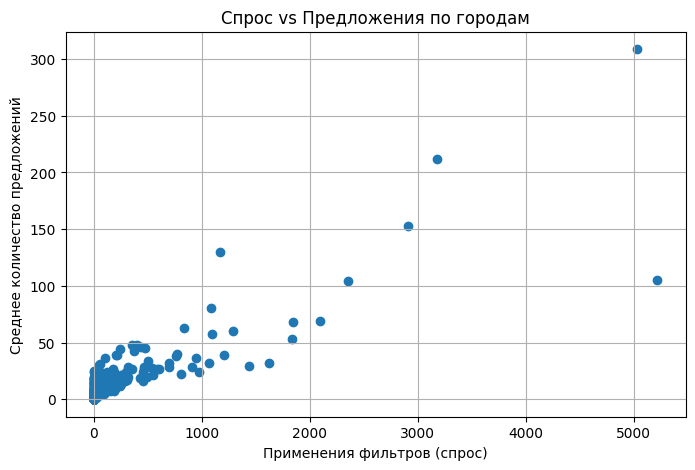

In [ ]:
offers_df = df[df['event_label'].str.contains('показать предложения', na=False)].copy()

offers_df['offers_count'] = offers_df['event_label'].str.extract(r'показать предложения\s*\((\d+)\)').astype(float)

avg_offers = offers_df.groupby('city')['offers_count'].mean()
# За спрос возьмем визиты и применения фильтров
visits = df[df['event_action'] == 'Page Visit'].groupby('city')['unique_events'].sum()
filter_applies = df[df['event_action'] == 'price_button_submit'].groupby('city')['unique_events'].sum()

city_demand = pd.concat([visits, filter_applies, avg_offers], axis=1)
city_demand.columns = ['visits', 'filter_applies', 'avg_offers']
city_demand = city_demand.fillna(0)

correlation = city_demand[['filter_applies', 'avg_offers']].corr().iloc[0,1]
print(f'Корреляция между спросом и предложениями: {correlation:.2f}')


plt.figure(figsize=(8,5))
plt.scatter(city_demand['filter_applies'], city_demand['avg_offers'])
plt.title('Спрос vs Предложения по городам')
plt.xlabel('Применения фильтров (спрос)')
plt.ylabel('Среднее количество предложений')
plt.grid(True)
plt.show()


0,87 - достаточно высокий уровень корреляции, показывающий, что спрос соответсвует предложению.

In [ ]:
city_clicks = df.groupby('city')[['total_events', 'unique_events']].sum()
city_clicks['ratio'] = city_clicks['total_events'] / city_clicks['unique_events']
city_clicks.sort_values('ratio', ascending=False).head()


,total_events,unique_events,ratio
city,,,
baikalsk,8,4,2.00000
bergen,4,2,2.00000
haarlem,10,5,2.00000
chemal,121,67,1.80597
calabria,63,35,1.80000


Топ городов по количеству релевантных предложений

In [ ]:
offers_df['offers_count'] = offers_df['event_label'].str.extract(r'показать предложения\s*\((\d+)\)').astype(float)

city_offers = offers_df.groupby('city')['offers_count'].sum()

city_offers.sort_values(ascending=False).head(10)


,offers_count
city,
saint petersburg,167627.0
moscow,81437.0
sochi,44106.0
adler,29044.0
kaliningrad,20701.0
istanbul,20689.0
tbilisi,11457.0
budapest,9163.0
dubai,9132.0


In [ ]:
clear_count = df[df['event_action'] == 'clear_filter_mobile'].shape[0]
submit_count = df[df['event_action'] == 'price_button_submit'].shape[0]

clear_ratio = clear_count / submit_count if submit_count else 0
print("Доля очисток фильтров по отношению к премененным применения: {clear_ratio:.2%}")


Доля очисток фильтров по отношению к премененным применения: 2.24%


Доля очисток фильтров по отношению к примененным: 2.24% - показывает, что в случае использования фильтров, они преимущественно оказываются эффективными.